In [2]:
# 지역별 월별 식중독 환자 수 파악하기 
# 공공데이터 사용

# 데이터 생성
areas = ["서울특별시", "부산광역시", "경기도", "경상남도"]
monthes = [month for month in range(1, 13)]
patients_per_area = {
    "월": monthes, 
    areas[0]: [70, 6, 0, 50, 26, 152, 37, 35, 10, 104, 106, 62],
    areas[1]: [2, 0, 98, 6, 16, 467, 104, 78, 239, 81, 21, 96],
    areas[2]: [12, 24, 69, 8, 128, 129, 68, 287, 63, 93, 43, 99],
    areas[3]: [0, 0, 0, 3, 38, 108, 89, 10, 11, 29, 77, 12]
}

In [3]:
import pandas as pd 

df = pd.DataFrame(patients_per_area)

df

,월,서울특별시,부산광역시,경기도,경상남도
0,1,70,2,12,0
1,2,6,0,24,0
2,3,0,98,69,0
3,4,50,6,8,3
4,5,26,16,128,38
5,6,152,467,129,108
6,7,37,104,68,89
7,8,35,78,287,10
8,9,10,239,63,11
9,10,104,81,93,29


In [4]:
patient_on_summer =  (5 < df["월"]) & (df["월"] < 9 )

patient_on_summer

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8     False
9     False
10    False
11    False
Name: 월, dtype: bool

In [5]:
patients_on_summer = df[patient_on_summer]

patients_on_summer

,월,서울특별시,부산광역시,경기도,경상남도
5,6,152,467,129,108
6,7,37,104,68,89
7,8,35,78,287,10


In [6]:
# 서울시를 기준으로 제일 환자가 많은 달 찾기  
sorted_data = df.sort_values(by=["서울특별시"], ascending=False)

sorted_data

,월,서울특별시,부산광역시,경기도,경상남도
5,6,152,467,129,108
10,11,106,21,43,77
9,10,104,81,93,29
0,1,70,2,12,0
11,12,62,96,99,12
3,4,50,6,8,3
6,7,37,104,68,89
7,8,35,78,287,10
4,5,26,16,128,38
8,9,10,239,63,11


In [7]:
sorted_data = df.sort_values(by=["부산광역시", "경기도"], ascending=[False, True])

sorted_data

,월,서울특별시,부산광역시,경기도,경상남도
5,6,152,467,129,108
8,9,10,239,63,11
6,7,37,104,68,89
2,3,0,98,69,0
11,12,62,96,99,12
9,10,104,81,93,29
7,8,35,78,287,10
10,11,106,21,43,77
4,5,26,16,128,38
3,4,50,6,8,3


In [8]:
# 인덱스를 월로 바꾸자
df_by_setting_index = df.set_index("월")

df_by_setting_index

,서울특별시,부산광역시,경기도,경상남도
월,,,,
1,70,2,12,0
2,6,0,24,0
3,0,98,69,0
4,50,6,8,3
5,26,16,128,38
6,152,467,129,108
7,37,104,68,89
8,35,78,287,10
9,10,239,63,11


In [9]:
# 부산광역시 누적 환자수
df["부산광역시 누적 환자 수"] = df["부산광역시"].cumsum()

df[["부산광역시", "부산광역시 누적 환자 수"]]

,부산광역시,부산광역시 누적 환자 수
0,2,2
1,0,2
2,98,100
3,6,106
4,16,122
5,467,589
6,104,693
7,78,771
8,239,1010
9,81,1091


In [10]:
# 월별 환자 총 수 
df["월별 환자 총 수"] = df["서울특별시"] + df["부산광역시"] + df["경상남도"] + df["경기도"]

df.set_index("월")

,서울특별시,부산광역시,경기도,경상남도,부산광역시 누적 환자 수,월별 환자 총 수
월,,,,,,
1,70,2,12,0,2,84
2,6,0,24,0,2,30
3,0,98,69,0,100,167
4,50,6,8,3,106,67
5,26,16,128,38,122,208
6,152,467,129,108,589,856
7,37,104,68,89,693,298
8,35,78,287,10,771,410
9,10,239,63,11,1010,323


In [11]:
df.drop("부산광역시 누적 환자 수", axis=1, inplace=True)

df

,월,서울특별시,부산광역시,경기도,경상남도,월별 환자 총 수
0,1,70,2,12,0,84
1,2,6,0,24,0,30
2,3,0,98,69,0,167
3,4,50,6,8,3,67
4,5,26,16,128,38,208
5,6,152,467,129,108,856
6,7,37,104,68,89,298
7,8,35,78,287,10,410
8,9,10,239,63,11,323
9,10,104,81,93,29,307


In [12]:
df["상위 4개 지역 누적환자 수"] = df["월별 환자 총 수"].cumsum()

df

,월,서울특별시,부산광역시,경기도,경상남도,월별 환자 총 수,상위 4개 지역 누적환자 수
0,1,70,2,12,0,84,84
1,2,6,0,24,0,30,114
2,3,0,98,69,0,167,281
3,4,50,6,8,3,67,348
4,5,26,16,128,38,208,556
5,6,152,467,129,108,856,1412
6,7,37,104,68,89,298,1710
7,8,35,78,287,10,410,2120
8,9,10,239,63,11,323,2443
9,10,104,81,93,29,307,2750


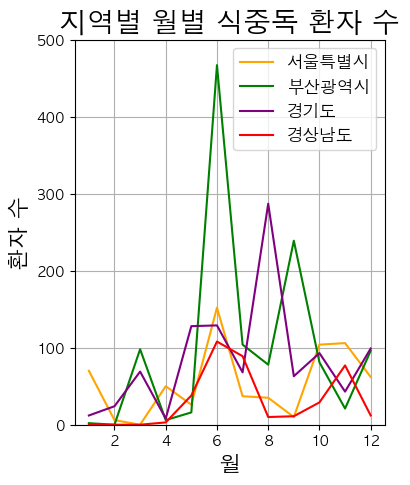

In [14]:
from matplotlib import pyplot
from matplotlib import dates

color_map = {
    "서울특별시": "orange",
    "부산광역시": "green",
    "경기도": "purple",
    "경상남도": "red",
}

pyplot.figure(figsize=(4, 5))
pyplot.rc("font", family="AppleGothic")

pyplot.title("지역별 월별 식중독 환자 수", fontsize=20)
pyplot.xlabel("월", fontsize=16)
pyplot.ylabel("환자 수", fontsize=16)

for areas in color_map.keys():
    pyplot.plot(df["월"], df[areas], label=areas, color=color_map[areas])

pyplot.ylim(0, 500)
pyplot.legend(fontsize=12)
pyplot.grid(True)
pyplot.show()